In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
df.duplicated().sum()

415

In [5]:
df=df.drop_duplicates(keep="first")

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(5157, 2)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'Category':'label'},inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer()
X = cv1.fit_transform(df['Message']).toarray()
y = df['label'].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
bnb1 = BernoulliNB()
bnb1.fit(x_train,y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
y_pred3 = bnb1.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9767441860465116
[[896   1]
 [ 23 112]]
0.9911504424778761


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bnb1, x_train, y_train, cv=5,scoring='accuracy').mean()
scores

0.9711515151515151

In [14]:
from sklearn import svm
clf1 = svm.SVC()
clf1.fit(x_train,y_train)
y_svm = clf1.predict(x_test)
print(accuracy_score(y_test,y_svm))
print(confusion_matrix(y_test,y_svm))
print(precision_score (y_test,y_svm))

0.9767441860465116
[[897   0]
 [ 24 111]]
1.0


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1, x_train, y_train, cv=5,scoring='accuracy').mean()
scores

0.9713939393939395

# EDA

In [16]:
copy_data = df.copy()

In [17]:
copy_data.head()

,label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
copy_data['label'].value_counts()

0    4516
1     641
Name: label, dtype: int64

In [19]:
! pip install nltk

In [20]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
copy_data['num_char'] = copy_data['Message'].apply(len)
copy_data['num_word'] = copy_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
copy_data['num_sentence'] = copy_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
copy_data.head()

,label,Message,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
copy_data.corr()

,label,num_char,num_word,num_sentence
label,1.000000,0.374409,0.256038,0.281055
num_char,0.374409,1.000000,0.966164,0.636615
num_word,0.256038,0.966164,1.000000,0.683371
num_sentence,0.281055,0.636615,0.683371,1.000000


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

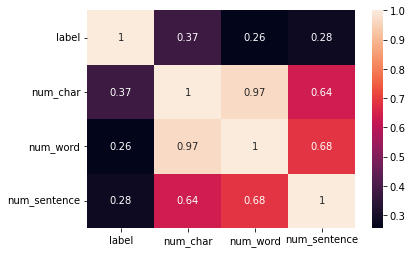

In [26]:
sns.heatmap(copy_data.corr(),annot=True)

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
def transform_message(text):
    text = nltk.word_tokenize(text)   # creat list
    y = []
    for i in text:
        if i.isalnum():     # remove %.....
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

In [33]:
copy_data["transform_text"] = copy_data["Message"].apply(transform_message)
copy_data.head()

,label,Message,num_char,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [34]:
cv = CountVectorizer()
A = cv.fit_transform(copy_data['transform_text']).toarray()
B = copy_data['label'].values

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=0)

In [36]:
from sklearn import svm
clf = svm.SVC()
clf.fit(A_train,B_train)
y_trans_svm = clf.predict(A_test)
print(accuracy_score(B_test,y_trans_svm))
print(confusion_matrix(B_test,y_trans_svm))
print(precision_score (B_test,y_trans_svm))

0.9709302325581395
[[896   1]
 [ 29 106]]
0.9906542056074766
